Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


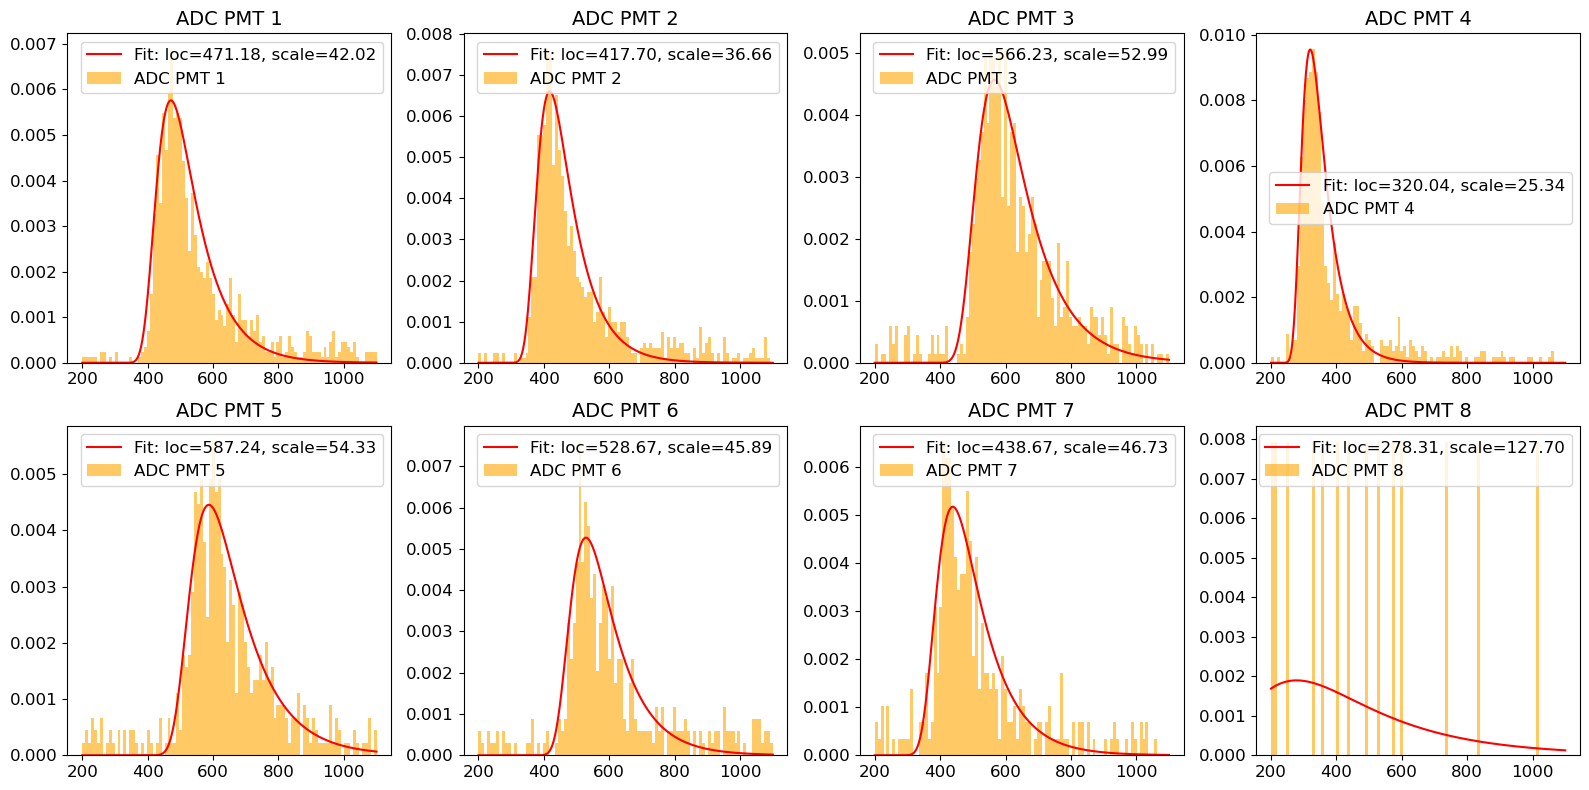

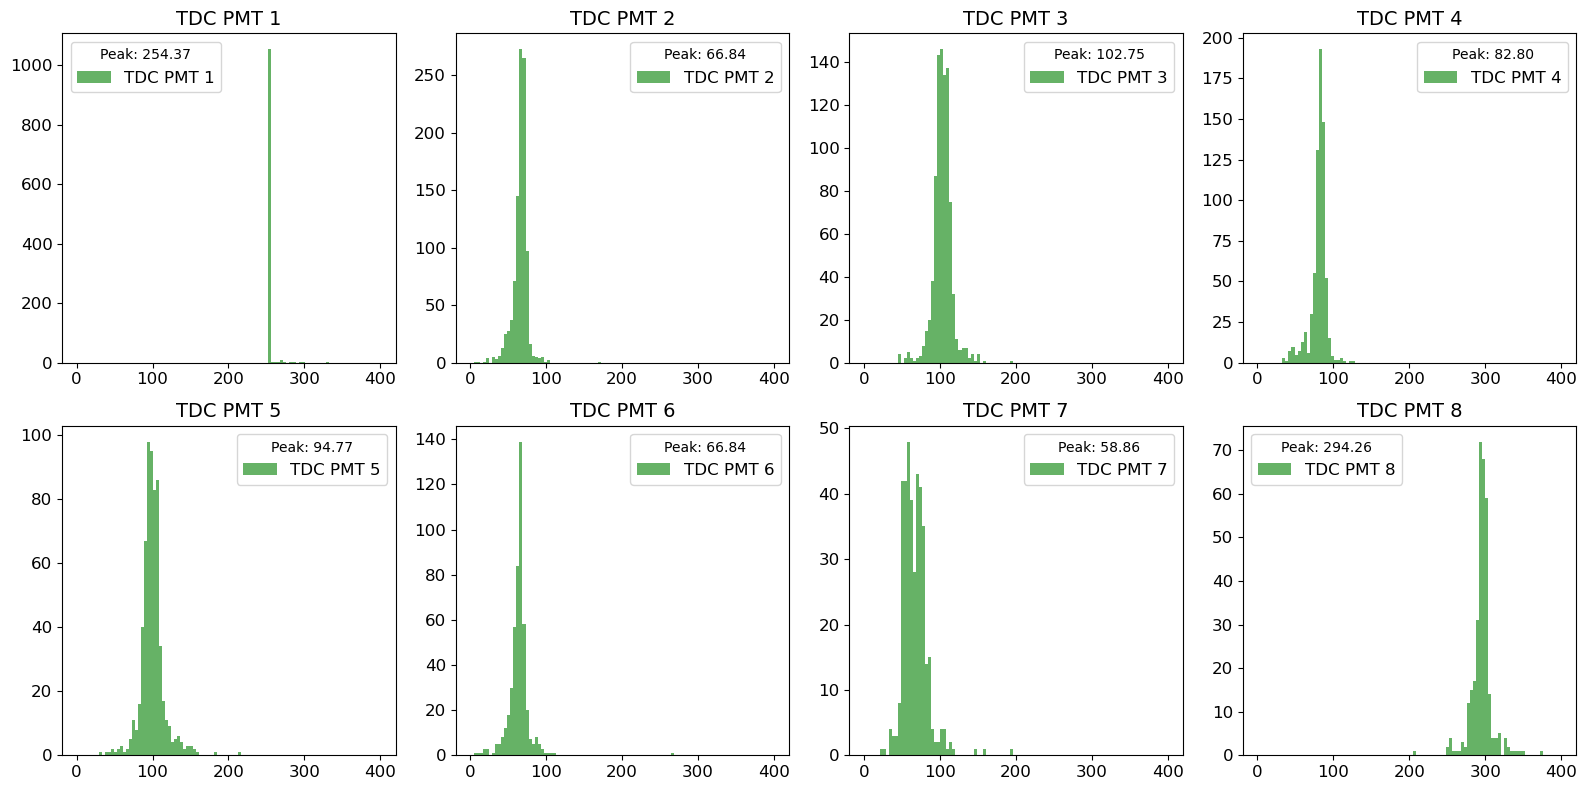

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress, moyal
from scipy.optimize import curve_fit

file = '20241209_1950V_8Feabs_15deg_trig23.txt'
ADC = np.genfromtxt(file, dtype=None, delimiter='\t', usecols=(1,2,3,4,5,6,7,8))
TDC = np.genfromtxt(file, dtype=None, delimiter='\t', usecols=(9,10,11,12,13,14,15,16))

adc_fit_parameters = []
tdc_peaks = []

fig_adc, axs_adc = plt.subplots(2, 4, figsize=(16, 8))
axs_adc = axs_adc.flatten()

for i in range(ADC.shape[1]):
    counts, bin_edges = np.histogram(ADC[:, i], range=(200, 1100), bins=100, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    try:
        popt, _ = curve_fit(moyal.pdf, bin_centers, counts, p0=[500, 50])
        loc, scale = popt
        adc_fit_parameters.append((loc, scale))
        
        x_fit = np.linspace(200, 1100, 500)
        y_fit = moyal.pdf(x_fit, *popt)
        axs_adc[i].plot(x_fit, y_fit, 'r-', label=f'Fit: loc={loc:.2f}, scale={scale:.2f}')
    except RuntimeError:
        adc_fit_parameters.append((np.nan, np.nan))
        axs_adc[i].text(0.5, 0.8, 'Fit Failed', transform=axs_adc[i].transAxes, fontsize=10, color='red', ha='center')
    
    axs_adc[i].hist(ADC[:, i], range=(200, 1100), bins=100, color='orange', alpha=0.6, density=True, label=f'ADC PMT {i+1}')
    axs_adc[i].set_title(f'ADC PMT {i+1}', fontsize=14)
    axs_adc[i].legend(fontsize=12)
    axs_adc[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
fig_adc.savefig('ADC_Distributions_8Fe_15deg.png')
plt.show()

# Create figure for TDC distributions
fig_tdc, axs_tdc = plt.subplots(2, 4, figsize=(16, 8))
axs_tdc = axs_tdc.flatten()

for i in range(TDC.shape[1]):
    tdc_counts, tdc_bins, _ = axs_tdc[i].hist(TDC[:, i], range=(1, 400), bins=100, color='green', alpha=0.6, label=f'TDC PMT {i+1}')
    tdc_peak_bin = np.argmax(tdc_counts)
    tdc_peak_x = 0.5 * (tdc_bins[tdc_peak_bin] + tdc_bins[tdc_peak_bin + 1])
    tdc_peaks.append(tdc_peak_x)
    
    axs_tdc[i].set_title(f'TDC PMT {i+1}', fontsize=14)
    axs_tdc[i].legend(title=f'Peak: {tdc_peak_x:.2f}', fontsize=12)
    axs_tdc[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
fig_tdc.savefig('TDC_Distributions_8Fe_15deg.png')
plt.show()